# Loading The Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import re

In [6]:
pip install nltk

     |████████████████████████████████| 1.4MB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 92kB 5.5MB/s  eta 0:00:01
     |████████████████████████████████| 307kB 4.7MB/s eta 0:00:01
     |████████████████████████████████| 665kB 28.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 4.4MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
Note: you may need to restart the kernel to use updated packages.


In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [8]:
train= pd.read_csv("train.csv")#load the data

In [9]:
test= pd.read_csv("test.csv")

In [10]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [14]:
train.shape

(20800, 5)

In [15]:
test.shape

(5200, 4)

In [16]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Data Cleaning and Visualization

In [17]:
train.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [18]:
train["label"].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [20]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

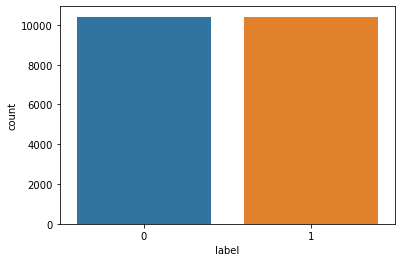

In [21]:
sns.countplot("label", data=train)

In [22]:
train= train.fillna(" ")
test=test.fillna(" ")


In [23]:
train.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [24]:
test.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [25]:
train["Full"]= train["title"]+ " "+  train["author"] + "  " + train["text"]
test["Full"]= test["title"]+ " "+  test["author"] + "  " + test["text"]

In [26]:
train["Full"].head()

0    House Dem Aide: We Didn’t Even See Comey’s Let...
1    FLYNN: Hillary Clinton, Big Woman on Campus - ...
2    Why the Truth Might Get You Fired Consortiumne...
3    15 Civilians Killed In Single US Airstrike Hav...
4    Iranian woman jailed for fictional unpublished...
Name: Full, dtype: object

# NLP Text Preprocessing

In [27]:
#Remove punctuations from the String  
s = "!</> hello please$$ </>^s!!!u%%bs&&%$cri@@@be^^^&&!& </>*to@# the&&\ cha@@@n##%^^&nel!@# %%$"

In [33]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyterlab/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyterlab/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [34]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

In [35]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['Full']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'Full'] = filter_sentence


In [36]:
train = train[['Full','label']]

In [37]:
train.head()

,Full,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1


# NLP Techniques Apply

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [39]:
#We need to have the X and Y 
X = train['Full']
Y = train['label']

In [40]:
count_vectorizer= CountVectorizer()
count_vectorizer.fit_transform(X)

<20800x210578 sparse matrix of type '<class 'numpy.int64'>'
	with 5990653 stored elements in Compressed Sparse Row format>

In [41]:
freq_term_matrix=count_vectorizer.transform(X)

In [42]:
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
X = tfidf.fit_transform(freq_term_matrix)

In [43]:
X

<20800x210578 sparse matrix of type '<class 'numpy.float64'>'
	with 5990653 stored elements in Compressed Sparse Row format>

In [44]:
#We also need to conver test dataset in samefromat like we did for train
test_counts = count_vectorizer.transform(test['Full'].values)
test_tfidf = tfidf.transform(test_counts)

# Training, Testing and Evaluating the Model

In [45]:
#splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [47]:
print(X_train.shape, y_train.shape)

(15600, 210578) (15600,)


In [48]:
print(X_test.shape, y_test.shape)

(5200, 210578) (5200,)


In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [92]:
logreg = LogisticRegression(C=1e5)

In [93]:
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)


In [94]:
print('Accuracy of Logistic Regression on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic Regrssion on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression on training set: 1.00
Accuracy of Logistic Regrssion on test set: 0.98


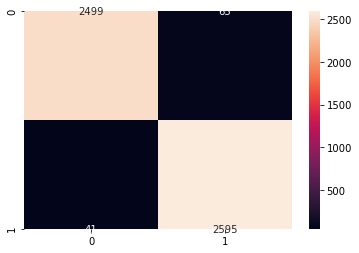

In [95]:

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d")

In [96]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2564
           1       0.98      0.98      0.98      2636

   micro avg       0.98      0.98      0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



In [97]:
from sklearn import metrics
metrics.accuracy_score(y_test, pred)

0.9796153846153847

In [98]:
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)



In [99]:
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))

Accuracy of NB  classifier on training set: 0.89
Accuracy of NB classifier on test set: 0.84


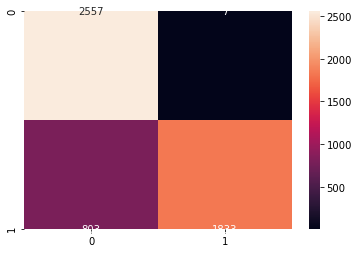

In [100]:

cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True, fmt="d")


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2564
           1       1.00      0.70      0.82      2636

   micro avg       0.84      0.84      0.84      5200
   macro avg       0.88      0.85      0.84      5200
weighted avg       0.88      0.84      0.84      5200



In [102]:
from sklearn import metrics
metrics.accuracy_score(y_test, pred)

0.8442307692307692

# Completed...but still lot of things to apply